# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.stats.weightstats as wstats
#import math

df = pd.read_csv('data/human_body_temperature.csv')

In [2]:
# Your work here.
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
#%matplotlib inlinedf.shape

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


In [4]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


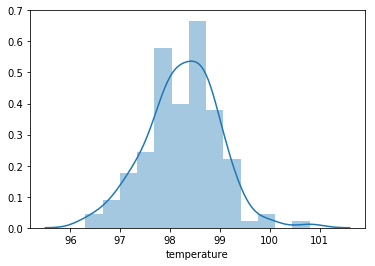

In [5]:
#mt = df[df.gender=='M']['temperature']
t = df.temperature
t_len = len(t)
#plt.hist(t, bins='auto')
#pd.DataFrame.hist(t, bins='auto')
sns.distplot(t,bins='auto')
plt.show()

In [6]:
k, p = stats.normaltest(t)
print('Normaltest P-value: '+ str(p))

Normaltest P-value: 0.2587479863488254


In [7]:
k, p = stats.shapiro(t)
print('Shapiro Test P-value: ' + str(p))

Shapiro Test P-value: 0.2331680953502655


Q1. Is the distribution of body temperatures normal? 

A1: Due to the large p-values, we can be confident that the distribution is normal.

Q2. Is the sample size large? Are the observations independent?

A2. For the purpose of calculating the mean and variance, a sample size of 30 is considered large enough. In this case, the sample size is 130, therefore considered large for our purposes. As for independence, there is no reason to belieive that the body temperature of one person is influenced by that of another. In addition, it is reasonable to assume that the measurements were taken under normal, not extreme conditions, therefore the observations are independent.


Q3.1. Is the true population mean really 98.6 degrees F?
First, try a bootstrap hypothesis test.

A3.1. 

Null Hypothesis: The mean temprature is 98.6

Alternate Hypothesis: The mean temprature is not 98.6


In [8]:
rep = np.empty(10000)
for i in range(10000):
    rep[i] = np.mean(np.random.choice(df['temperature'], t_len))

c_int = np.percentile(rep, [2.5, 97.5])
p = sum(rep >= 98.6) / len(rep)
print('Bootstrap mean:', np.mean(rep))
print('95% Confidence Interval:', c_int)
print('p-value:', p)

Bootstrap mean: 98.24921415384614
95% Confidence Interval: [98.12538462 98.37153846]
p-value: 0.0


Q3.2. Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?

A3.2. Since we are considering men and women in a single population for this question, a one-sample test wiil be used.

Q3.3. In this situation, is it appropriate to use the $t$ or $z$ statistic? 

A3.3. The $t$ statistic is intended for small sample sizes, which is not the case here:

In [9]:
z,p_z = wstats.ztest(df.temperature,value=98.6,ddof=1)
print('z-Test P-value: ', p_z) #zp_value)

z-Test P-value:  4.9021570141012155e-08


Due to the extremely small p-value we can reject the null hypothesis.

Q3.4. Now try using the other test. How will the result be different? Why?

In [10]:
t,p_t=stats.ttest_1samp(df.temperature, 98.6)
print('t-Test P-value: ', p_t)

t-Test P-value:  2.4106320415561276e-07


Again we have an extremely small p-value and are able to reject the null hypothesis.

Q4.1.  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
Which one is the correct one to use? 


In [11]:
for i in range(10):
    t_rand = np.random.choice(df.temperature, size=10)
    t,p_t=stats.ttest_1samp(t_rand, 98.6)
    z,p_z = wstats.ztest(t_rand,value=98.6,ddof=1)
    print('z-Test P-value: ', p_z)
    print('t-Test P-value: ', p_t)
    print('---------------')

z-Test P-value:  0.3316262452174923
t-Test P-value:  0.35699285942992665
---------------
z-Test P-value:  0.006463527198202946
t-Test P-value:  0.023481010434861223
---------------
z-Test P-value:  0.4794578841931444
t-Test P-value:  0.49735876839714244
---------------
z-Test P-value:  0.7838395932066637
t-Test P-value:  0.7900320810408448
---------------
z-Test P-value:  0.016734113329972194
t-Test P-value:  0.04039163076689778
---------------
z-Test P-value:  0.23362354201851954
t-Test P-value:  0.2640873284552705
---------------
z-Test P-value:  0.0065176186894023
t-Test P-value:  0.02358711131464477
---------------
z-Test P-value:  0.44193968047117416
t-Test P-value:  0.4616403292065233
---------------
z-Test P-value:  0.008344927058017678
t-Test P-value:  0.027011649292337615
---------------
z-Test P-value:  0.7556728066705889
t-Test P-value:  0.7627594745338224
---------------


We ran the test ten times and we can see the large variation in the p-values due to the extremely small sample size.

Q4.2. What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?

A4.2. The results show that both tests are unreliable for such a small sample size.


Q5. At what temperature should we consider someone's temperature to be "abnormal"?
As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.

Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.

In [12]:
#For 95% Confidence Interval, the critical value is: 1.96.
#Margin of error: me = 1.96 * Standard Error
#Standard Error: se = standard deviation / sqrt(n)
s_mean = np.mean(df.temperature)
s_std = np.std(df.temperature, ddof=1)
se = s_std/np.sqrt(t_len)
me = 1.96*se
#confidence interval: mean +/- me
CI = [s_mean-me,s_mean+me]
print('95% confidence interval: ', CI)

95% confidence interval:  [98.12319411222852, 98.37526742623304]


Any temperature ouside this interval may be considered abnormal by the 95% confidence criterion.

Q6.1. Is there a significant difference between males and females in normal temperature?
What testing approach did you use and why?

In [13]:
#The null hyphothesis is: the mean of temperature in female and male are equal
t_male = df[df.gender == 'M'].temperature
t_female = df[df.gender == 'F'].temperature
#Calculate the observed difference
diff_means = np.mean(t_female)-np.mean(t_male)
print('The difference of means in the two groups: ', diff_means)

#We treat the female and male as two groups, assuming both norm distributed, a two samples z test will be used
z,p=wstats.ztest(t_female,t_male,value=0,ddof=1)
print ('z-test p-value:', p)
#We treat the female and male as two groups, a two samples t test will be used
t,p=stats.ttest_ind(t_female,t_male)
print ('t-test p-value:', p)


The difference of means in the two groups:  0.289230769230727
z-test p-value: 0.02228736076065755
t-test p-value: 0.02393188312239561


Therefore there is no significant difference between men and women's body temperatures.

Q6.2. Write a story with your conclusion in the context of the original problem.

A6.2. The main conlusions are that (1) the normal body temperature for people may vary in a statistically significant way, and (2) this variation is not correlated with gender.